# The code used to reproduce Figure 3.

### 1. Import relevant libraries

In [1]:
'''Set the parameter "precision_bits:" in line 7 of the "default.yaml" file in Crypten to "26".'''
import crypten
import torch
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time
crypten.init()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-5xg0r7jq because the default path (/home/luojinglong/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Fontconfig error: Cannot load default config file


### 2. Define PP-Exp Algorithm

In [2]:
def ppexp(x):
    r = (torch.rand(1) -0.5)*28
    r_enc = crypten.cryptensor(r)
    neg_r = -r
    neg_r_exp = 2.7183**neg_r
    neg_r_exp_enc = crypten.cryptensor(neg_r_exp)
    d_enc = x + r_enc
    d_plain = d_enc.get_plain_text()
    d_exp = 2.7183 ** d_plain
    y = neg_r_exp_enc.mul(d_exp)
    return y

### 3. Accuracy comparison with polynomials

In [3]:
# Plaintext
m_acc = []
for i in np.linspace(-4,0,100):
    x = torch.tensor([i])
    m_acc.append(float(x.exp()[0]))

In [4]:
# Polynomial 
import math
def poly1(x):
    result = 0
    for i in range(7):
        result += x**i / math.factorial(i)
    return result

p1_acc = []
for i in np.linspace(-4,0,100):
    x = torch.tensor([i])
    p1_acc.append(float(poly1(x)[0]))

def poly2(x):
    result = 0
    for i in range(9):
        result += x**i / math.factorial(i)
    return result

p2_acc = []
for i in np.linspace(-4,0,100):
    x = torch.tensor([i])
    p2_acc.append(float(poly2(x)[0]))

def poly3(x):
    result = 0
    for i in range(11):
        # print(i)
        result += x**i / math.factorial(i)
    return result

p3_acc = []
for i in np.linspace(-4,0,100):
    x = torch.tensor([i])
    p3_acc.append(float(poly3(x)[0]))

In [5]:
# ppexp
s_acc = []
for i in np.linspace(-4,0,100):
    x = torch.tensor([i,i])
    x_enc = crypten.cryptensor(x)
    s_acc.append(float(ppexp(x_enc).get_plain_text()[0]))

/home/luojinglong/anaconda3/envs/Crypten/lib/python3.7/site-packages/crypten/encoder.py:75: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dividend = tensor // self._scale - correction


In [6]:
# loss
m_acc = np.array(m_acc)
p1_loss = np.array(p1_acc) - m_acc
p2_loss = np.array(p2_acc) - m_acc
p3_loss = np.array(p3_acc) - m_acc
sacc_loss = np.array(s_acc) - m_acc

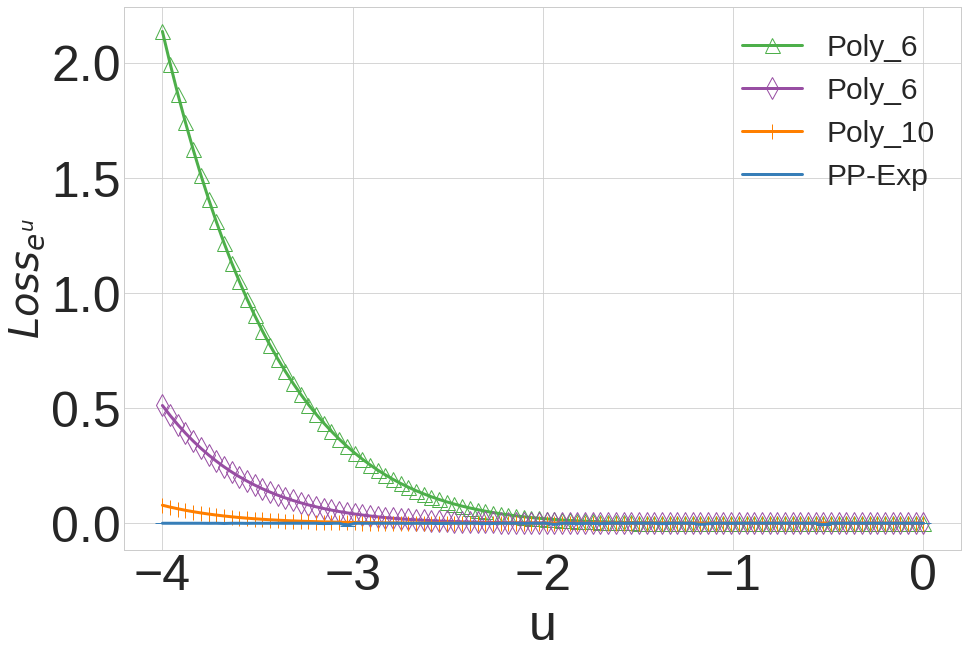

In [7]:
# Polynomail Comparision Plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

palette = pyplot.get_cmap('Set1')
plt.style.use('seaborn-whitegrid')

plt.figure(num = 1,figsize = (15,10))

x = np.linspace(-4,0,100)

#polynomial实验对比
y1 = np.array(p1_loss)
y2 = np.array(p2_loss)
y3 = np.array(p3_loss)
y4 = np.array(sacc_loss)


ax1 = plt.axes()  
l1, = ax1.plot(x, y1, color=palette(2),linewidth=3.0, label='Poly_6', marker = "^",markersize=15, markerfacecolor='none')
l2, = ax1.plot(x, y2, color=palette(3),linewidth=3.0, label='Poly_6', marker = "d",markersize=15, markerfacecolor='none')
l3, = ax1.plot(x, y3, color=palette(4),linewidth=3.0, label='Poly_10', marker = "|",markersize=15, markerfacecolor='none')
l4, = ax1.plot(x, y4, color=palette(1), linewidth=3.0, marker = "_", label='PP-Exp',markersize=15, markerfacecolor='none')


ax1.legend(loc = 'upper right', fontsize=30)
plt.xlabel('u', fontsize=50)
ax1.set_ylabel('$Loss_{e^u}$',fontsize=40)
# plt.ylabel('$Loss_{e^u}$', fontsize=30)
plt.tick_params(labelsize=50)
plt.savefig ('compare with polynomail')

### 4. Accuracy comparison with Crypten

In [8]:
# Crypten 
c_acc = []
for i in np.linspace(-4,0,100):
    x = torch.tensor([i])
    x_enc = crypten.cryptensor(x)
    c_acc.append(float(x_enc.exp().get_plain_text()[0]))
print(c_acc)

/home/luojinglong/anaconda3/envs/Crypten/lib/python3.7/site-packages/crypten/encoder.py:75: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dividend = tensor // self._scale - correction


[0.017746254801750183, 0.018489748239517212, 0.01926429569721222, 0.020071178674697876, 0.020911559462547302, 0.02178715169429779, 0.022699251770973206, 0.023649215698242188, 0.024638965725898743, 0.025669917464256287, 0.026743724942207336, 0.027862370014190674, 0.029027611017227173, 0.03024129569530487, 0.03150564432144165, 0.032822638750076294, 0.03419432044029236, 0.035623252391815186, 0.03711159527301788, 0.038661763072013855, 0.040276527404785156, 0.04195854067802429, 0.04371026158332825, 0.045535072684288025, 0.04743573069572449, 0.04941520094871521, 0.0514771044254303, 0.05362465977668762, 0.05586126446723938, 0.058191120624542236, 0.060617595911026, 0.06314466893672943, 0.06577694416046143, 0.06851840019226074, 0.07137374579906464, 0.07434733211994171, 0.07744449377059937, 0.08067014813423157, 0.08402946591377258, 0.08752813935279846, 0.09117226302623749, 0.0949668437242508, 0.09891921281814575, 0.10303536057472229, 0.10732157528400421, 0.11178596317768097, 0.11643533408641815,

In [9]:
# By setting the value of "exp_iterations" in line 12 of the Crypten "default.yaml" file to 4, 6, 8", the exponents are calculated for different numbers of iterations.
m_acc = np.array([0.01831563888873418, 0.019070818116235688, 0.0198571344320536, 0.020675871661581288, 0.021528366564116053, 0.022416011015397436, 0.023340254280134736, 0.024302605378233897, 0.02530463554858724, 0.026347980814448734, 0.02743434465458312, 0.028565500784550377, 0.029743296052666263, 0.030969653455367462, 0.03224657527690433, 0.033576146358487546, 0.03496053750222628, 0.036402009015415376, 0.03790291440095852, 0.03946570419995252, 0.04109292999270688, 0.04278724856473082, 0.04455142624448969, 0.04638834342001332, 0.04830099924173013, 0.05029251651920589, 0.05236614681978153, 0.05452527577743516, 0.05677342862053571, 0.05911427592751333, 0.06155163961984455, 0.06408949920213611, 0.0667319982594962, 0.06948345122280154, 0.07234835041290565, 0.07533137337528963, 0.07843739051713067, 0.08167147305925784, 0.08503890131597773, 0.08854517331628882, 0.09219601378056068, 0.09599738346733408, 0.09995548890550252, 0.10407679252776504, 0.10836802322189586, 0.11283618731705691, 0.11748858002309155, 0.1223327973414763, 0.1273767484673777, 0.13262866870306309, 0.13809713290374892, 0.14379106947784104, 0.14971977496442293, 0.15589292921179554, 0.1623206111818482, 0.1690133154060661, 0.17598196912004221, 0.18323795010446814, 0.1907931052617347, 0.1986597699584708, 0.20685078816560215, 0.21537953342881339, 0.22425993070364997, 0.2335064790909135, 0.2431342755094669, 0.25315903934510436, 0.2635971381157268, 0.27446561419472865, 0.28578221263622744, 0.2975654101475654, 0.30983444525638876, 0.3226093497215558, 0.3359109812391624, 0.3497610574970809, 0.364182191633615, 0.37919792915816547, 0.39483278639418434, 0.41111229050718745, 0.4280630211831761, 0.44571265402551763, 0.4640900057411423, 0.48322508118982554, 0.503149122373382, 0.5238946594447482, 0.5454955638202436, 0.5679871034817217, 0.5914060005589061, 0.6157904912859289, 0.6411803884299547, 0.6676171462938306, 0.695143928398879, 0.7238056779583512, 0.7536491912565965, 0.784723194053756, 0.8170784211407317, 0.8507676991743113, 0.8858460329277069, 0.9223706950973192, 0.960401319812358, 1.0])
s_acc = np.array([0.018314924091100693, 0.019069833680987358, 0.019856607541441917, 0.020675014704465866, 0.02152780443429947, 0.022415177896618843, 0.02333965338766575, 0.024301964789628983, 0.025304006412625313, 0.026347270235419273, 0.027433643117547035, 0.028564823791384697, 0.029742591083049774, 0.03096289560198784, 0.032245829701423645, 0.033575378358364105, 0.034958451986312866, 0.03638159856200218, 0.03789900243282318, 0.03946484625339508, 0.04109108820557594, 0.04278634116053581, 0.04455045610666275, 0.04625970870256424, 0.048299990594387054, 0.05029149353504181, 0.052365049719810486, 0.05452420562505722, 0.05677233263850212, 0.05911314859986305, 0.0615483894944191, 0.06408832222223282, 0.06673068553209305, 0.0694119855761528, 0.07234685122966766, 0.07533006370067596, 0.07843166589736938, 0.08156637847423553, 0.08503379672765732, 0.08854328095912933, 0.09219452738761902, 0.09599587321281433, 0.09995339065790176, 0.104075126349926, 0.10836640000343323, 0.11283452808856964, 0.1174866184592247, 0.12233106046915054, 0.12737496197223663, 0.13262687623500824, 0.13809530436992645, 0.14378920197486877, 0.1497178077697754, 0.1558893620967865, 0.16231833398342133, 0.16901129484176636, 0.17597991228103638, 0.1832343190908432, 0.19075700640678406, 0.1986565738916397, 0.20684848725795746, 0.21537497639656067, 0.2242567241191864, 0.23350417613983154, 0.24313190579414368, 0.25315672159194946, 0.26355376839637756, 0.2743796706199646, 0.28577810525894165, 0.29756152629852295, 0.3098291754722595, 0.3226069211959839, 0.33590856194496155, 0.3497558832168579, 0.36417973041534424, 0.3791954517364502, 0.3948303163051605, 0.4111090898513794, 0.4280605912208557, 0.4457101821899414, 0.46390074491500854, 0.4832227826118469, 0.503146231174469, 0.5238487720489502, 0.5454933047294617, 0.5679680705070496, 0.5913228988647461, 0.615788459777832, 0.6411564350128174, 0.6675768494606018, 0.6951345205307007, 0.7238023281097412, 0.7536476850509644, 0.7847219109535217, 0.8170773386955261, 0.8507668375968933, 0.8858453035354614, 0.9223700761795044, 0.9604005217552185, 1.0])
c_acc_4 = np.array([0.010022595524787903, 0.010576384142041206, 0.011158760637044907, 0.011771099641919136, 0.012414833530783653, 0.01309145987033844, 0.0138025414198637, 0.014549709856510162, 0.01533466950058937, 0.01615919917821884, 0.01702515222132206, 0.017934465780854225, 0.018889160826802254, 0.019891344010829926, 0.020943207666277885, 0.022047050297260284, 0.023205257952213287, 0.024420320987701416, 0.0256948359310627, 0.027031511068344116, 0.028433164581656456, 0.029902735725045204, 0.031443286687135696, 0.033058010041713715, 0.03475021570920944, 0.036523379385471344, 0.038381095975637436, 0.04032711684703827, 0.04236534982919693, 0.04449985921382904, 0.04673486948013306, 0.049074798822402954, 0.05152421444654465, 0.054087892174720764, 0.05677078664302826, 0.0595780611038208, 0.06251507252454758, 0.06558740884065628, 0.06880086660385132, 0.0721614882349968, 0.07567552477121353, 0.07934950292110443, 0.0831902027130127, 0.08720465749502182, 0.09140019118785858, 0.09578438848257065, 0.10036514699459076, 0.10515068471431732, 0.11014950275421143, 0.11537045240402222, 0.1208227202296257, 0.12651585042476654, 0.13245972990989685, 0.1386646330356598, 0.14514125883579254, 0.15190064907073975, 0.15895430743694305, 0.16631415486335754, 0.1739925593137741, 0.18200233578681946, 0.19035683572292328, 0.1990698277950287, 0.20815564692020416, 0.21762913465499878, 0.22750568389892578, 0.23780125379562378, 0.24853241443634033, 0.259716272354126, 0.27137064933776855, 0.2835139334201813, 0.29616522789001465, 0.3093442916870117, 0.32307168841362, 0.33736854791641235, 0.3522569537162781, 0.367759644985199, 0.3839001953601837, 0.4007030725479126, 0.418193519115448, 0.4363977909088135, 0.45534297823905945, 0.47505709528923035, 0.49556928873062134, 0.5169095396995544, 0.5391090512275696, 0.5622000098228455, 0.586215615272522, 0.6111905574798584, 0.6371603012084961, 0.6641618013381958, 0.6922332644462585, 0.7214140892028809, 0.7517451643943787, 0.7832686305046082, 0.8160281777381897, 0.8500688672065735, 0.8854373693466187, 0.9221818447113037, 0.9603522419929504, 1.0])
c_acc_6 = np.array([0.016075395047664642, 0.016783108934760094, 0.01752147264778614, 0.018291790038347244, 0.019095422700047493, 0.019933786243200302, 0.020808355882763863, 0.021720673888921738, 0.022672338411211967, 0.023665018379688263, 0.024700457230210304, 0.025780458003282547, 0.02690691128373146, 0.028081784024834633, 0.02930711954832077, 0.030585050582885742, 0.03191779926419258, 0.03330767899751663, 0.034757085144519806, 0.03626854717731476, 0.037844665348529816, 0.03948815166950226, 0.04120185598731041, 0.042988721281290054, 0.04485180974006653, 0.046794332563877106, 0.04881961643695831, 0.05093112587928772, 0.053132474422454834, 0.0554274246096611, 0.057819873094558716, 0.06031391769647598, 0.06291379034519196, 0.06562389433383942, 0.06844885647296906, 0.07139343023300171, 0.07446262240409851, 0.07766161859035492, 0.08099578320980072, 0.08447078615427017, 0.08809244632720947, 0.09186684340238571, 0.09580033272504807, 0.09989950805902481, 0.10417120903730392, 0.10862261056900024, 0.11326111853122711, 0.11809448152780533, 0.12313076108694077, 0.12837831676006317, 0.13384585082530975, 0.13954249024391174, 0.14547762274742126, 0.15166106820106506, 0.1581030786037445, 0.16481426358222961, 0.17180567979812622, 0.17908886075019836, 0.1866757720708847, 0.19457882642745972, 0.20281106233596802, 0.21138589084148407, 0.22031736373901367, 0.2296200841665268, 0.23930920660495758, 0.24940051138401031, 0.2599104344844818, 0.27085602283477783, 0.2822551131248474, 0.29412609338760376, 0.3064882457256317, 0.31936150789260864, 0.33276671171188354, 0.34672537446022034, 0.3612601161003113, 0.37639424204826355, 0.39215198159217834, 0.40855878591537476, 0.4256408214569092, 0.44342538714408875, 0.46194103360176086, 0.48121723532676697, 0.501284658908844, 0.5221753716468811, 0.5439225435256958, 0.5665606260299683, 0.5901256799697876, 0.6146548986434937, 0.6401870250701904, 0.66676265001297, 0.6944234371185303, 0.7232130765914917, 0.7531769275665283, 0.7843621373176575, 0.8168174028396606, 0.8505938053131104, 0.8857442736625671, 0.9223235845565796, 0.9603890776634216, 1.0])
c_acc_8 = np.array([0.017746277153491974, 0.01848977617919445, 0.01926429010927677, 0.020071130245923996, 0.02091161161661148, 0.02178715541958809, 0.022699199616909027, 0.023649267852306366, 0.0246389489620924, 0.02566986344754696, 0.026743760332465172, 0.02786237746477127, 0.02902759425342083, 0.030241359025239944, 0.03150565177202225, 0.032822608947753906, 0.03419435769319534, 0.03562323749065399, 0.037111565470695496, 0.03866181522607803, 0.04027657210826874, 0.04195849597454071, 0.0437103733420372, 0.04553508386015892, 0.04743564873933792, 0.049415260553359985, 0.051477111876010895, 0.053624674677848816, 0.05586142838001251, 0.058191150426864624, 0.0606175921857357, 0.06314481049776077, 0.06577697396278381, 0.06851840764284134, 0.07137364894151688, 0.0743473619222641, 0.07744445651769638, 0.08067010343074799, 0.08402948826551437, 0.08752823621034622, 0.09117205440998077, 0.09496693313121796, 0.09891916811466217, 0.10303518176078796, 0.10732181370258331, 0.11178599298000336, 0.11643517762422562, 0.12127687782049179, 0.12631909549236298, 0.13157013058662415, 0.13703852891921997, 0.14273333549499512, 0.1486637443304062, 0.15483954548835754, 0.16127097606658936, 0.16796839237213135, 0.17494286596775055, 0.1822056621313095, 0.18976886570453644, 0.19764462113380432, 0.205845907330513, 0.2143862545490265, 0.22327935695648193, 0.23253992199897766, 0.24218298494815826, 0.25222423672676086, 0.2626802921295166, 0.27356788516044617, 0.28490501642227173, 0.29670998454093933, 0.3090021014213562, 0.3218015134334564, 0.33512887358665466, 0.3490059971809387, 0.36345526576042175, 0.3785005211830139, 0.3941657841205597, 0.4104767441749573, 0.427460253238678, 0.44514331221580505, 0.46355512738227844, 0.4827251136302948, 0.5026847124099731, 0.5234664678573608, 0.5451036095619202, 0.5676318407058716, 0.5910869836807251, 0.6155076026916504, 0.6409328579902649, 0.6674039959907532, 0.6949643492698669, 0.7236577272415161, 0.7535315155982971, 0.7846330404281616, 0.817013144493103, 0.8507242798805237, 0.8858205676078796, 0.922359049320221, 0.9603981971740723, 1.0])

In [10]:
# Accuracy loss
closs_4 = abs(c_acc_4 - m_acc)
closs_6 = abs(c_acc_6 - m_acc)
closs_8 = abs(c_acc_8 - m_acc)
sacc_loss = abs(s_acc - m_acc)

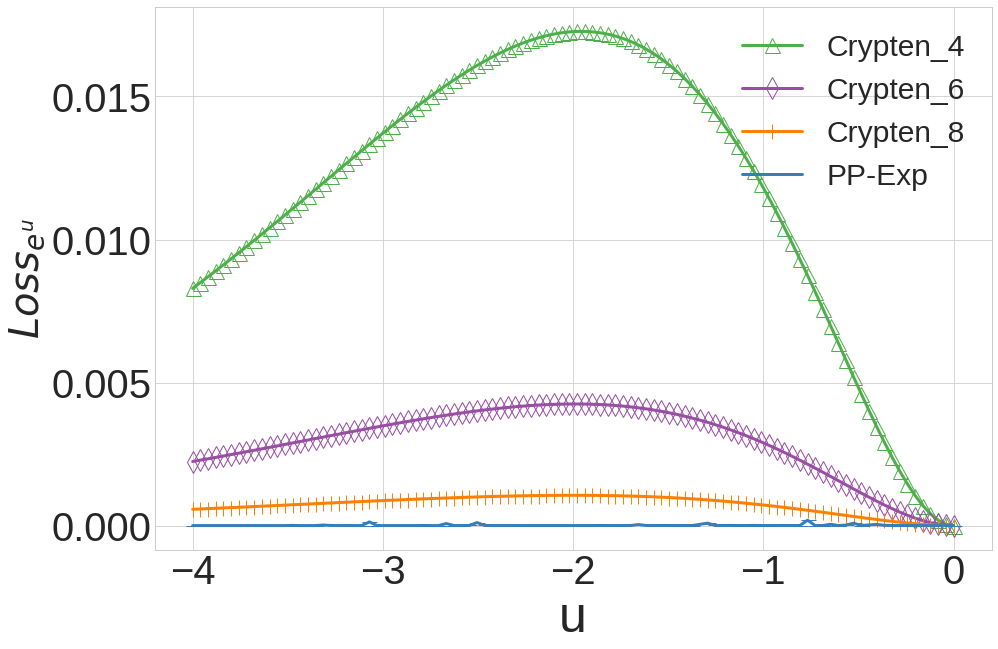

In [11]:
# Crypten Comparision Plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

palette = pyplot.get_cmap('Set1')
plt.style.use('seaborn-whitegrid')

plt.figure(num = 1,figsize = (15,10))

x = np.linspace(-4,0,100)
y1 = np.array(closs_4)
y2 = np.array(closs_6)
y3 = np.array(closs_8)
y4 = np.array(sacc_loss)


ax1 = plt.axes()  

l1, = ax1.plot(x, y1, color=palette(2),linewidth=3.0, label='Crypten_4', marker = "^",markersize=15, markerfacecolor='none')
l2, = ax1.plot(x, y2, color=palette(3),linewidth=3.0, label='Crypten_6', marker = "d",markersize=15, markerfacecolor='none')
l3, = ax1.plot(x, y3, color=palette(4),linewidth=3.0, label='Crypten_8', marker = "|",markersize=15, markerfacecolor='none')
l4, = ax1.plot(x, y4, color=palette(1), linewidth=3.0, marker = "_", label='PP-Exp',markersize=15, markerfacecolor='none')

ax1.legend(loc = 'upper right', fontsize=30)
plt.xlabel('u', fontsize=50)
ax1.set_ylabel('$Loss_{e^u}$',fontsize=40)
# plt.ylabel('$Loss_{e^u}$', fontsize=30)
plt.tick_params(labelsize=40)
plt.savefig ('Compare with crypten')